In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [55]:
# Cargar el archivo train.csv desde la misma carpeta
td = pd.read_csv('dataset_concatenado_con_desviacion.csv', low_memory=False)

# Ver las primeras filas del archivo
td.head()

,id,destination,route,alternate_route,departure_time,arrival_time,current_time,traffic_streets,distance_to_next_stop,time_estimate,...,incident_description,deviation,fecha,medio_transporte,linea,pasajeros,tiempo_espera_min,puntualidad,incidencias,desviacion
0,1.0,Puerta del Sol,Linea 3,Linea 9,19:49,20:00,19:58,Paseo del Prado,2.12,55.0,...,Tráfico denso,sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789186
1,2.0,Plaza Castilla,Linea 9,Linea 7,02:23,02:36,02:50,Calle Atocha,2.44,21.0,...,Retraso por obras,sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.604428
2,3.0,Puerta del Sol,Linea 4,Linea 2,18:58,19:31,19:11,Calle de Bravo Murillo,0.60,29.0,...,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053541
3,4.0,Retiro,Linea 1,Linea 8,13:40,14:00,13:43,Calle de Guzmán el Bueno,4.56,29.0,...,NaN,sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.769928
4,5.0,Retiro,Linea 2,Linea 5,05:58,06:19,06:13,Calle Alcalá,3.57,48.0,...,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.175909


In [56]:
td.shape

(200000, 30)

In [57]:
td.columns

Index(['id', 'destination', 'route', 'alternate_route', 'departure_time',
       'arrival_time', 'current_time', 'traffic_streets',
       'distance_to_next_stop', 'time_estimate', 'day_of_week', 'time_of_day',
       'traffic_status', 'traffic_delay', 'vehicle_type',
       'alternate_route_available', 'alternate_route_time_estimate',
       'route_efficiency', 'incident_occurred', 'incident_type',
       'incident_description', 'deviation', 'fecha', 'medio_transporte',
       'linea', 'pasajeros', 'tiempo_espera_min', 'puntualidad', 'incidencias',
       'desviacion'],
      dtype='object')

In [58]:
td.drop(['id', 'route',  'deviation', 'pasajeros','alternate_route','distance_to_next_stop','current_time','day_of_week','time_of_day',
       'route_efficiency','medio_transporte','pasajeros','desviacion','arrival_time','route_efficiency'],axis = 1, inplace = True)
td.head()

,destination,departure_time,traffic_streets,time_estimate,traffic_status,traffic_delay,vehicle_type,alternate_route_available,alternate_route_time_estimate,incident_occurred,incident_type,incident_description,fecha,linea,tiempo_espera_min,puntualidad,incidencias
0,Puerta del Sol,19:49,Paseo del Prado,55.0,congestionado,12.0,metro,sí,63.0,sí,accidente,Tráfico denso,NaN,NaN,NaN,NaN,NaN
1,Plaza Castilla,02:23,Calle Atocha,21.0,moderado,0.0,autobús,no,NaN,sí,avería,Retraso por obras,NaN,NaN,NaN,NaN,NaN
2,Puerta del Sol,18:58,Calle de Bravo Murillo,29.0,fluido,0.0,autobús,sí,43.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Retiro,13:40,Calle de Guzmán el Bueno,29.0,congestionado,14.0,autobús,no,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Retiro,05:58,Calle Alcalá,48.0,congestionado,0.0,autobús,no,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***RELLENAR VALORES NULOS***

In [59]:
td.isnull().sum()

destination                      100000
departure_time                   100000
traffic_streets                  100000
time_estimate                    100000
traffic_status                   100000
traffic_delay                    100000
vehicle_type                     100000
alternate_route_available        100000
alternate_route_time_estimate    150114
incident_occurred                100000
incident_type                    149914
incident_description             149914
fecha                            100000
linea                            100000
tiempo_espera_min                100000
puntualidad                      100000
incidencias                      100000
dtype: int64

In [60]:
td.dtypes

destination                       object
departure_time                    object
traffic_streets                   object
time_estimate                    float64
traffic_status                    object
traffic_delay                    float64
vehicle_type                      object
alternate_route_available         object
alternate_route_time_estimate    float64
incident_occurred                 object
incident_type                     object
incident_description              object
fecha                             object
linea                             object
tiempo_espera_min                float64
puntualidad                       object
incidencias                       object
dtype: object

In [61]:

# Para columnas de fecha
for col in ['current_time', 'fecha']:
    if col not in td.columns:
        td[col] = pd.Timestamp('2023-10-01')
    else:
        td[col] = td[col].fillna(pd.Timestamp('2023-10-01'))
td['traffic_delay'] = td['traffic_delay'].fillna(td['traffic_delay'].mean())


columnas_a_llenar = {
    'day_of_week': 'Lunes',
    'time_of_day': '08:00',
    'traffic_status': 'Desconocido',
    'incident_occurred': 0,
    'incident_type': 'Ninguno',
    'incident_description': 'Sin descripción'
}


# Rellenar columnas de fechas con un valor constante o el valor más frecuente
td['current_time'] = td['current_time'].fillna(pd.Timestamp('2023-10-01'))  # Cambia la fecha según sea necesario
td['fecha'] = td['fecha'].fillna(pd.Timestamp('2023-10-01'))


# Rellenar el estado del tráfico
td['traffic_status'] = td['traffic_status'].fillna('Desconocido')  # O la moda

# Rellenar incidencias
td['incident_occurred'] = td['incident_occurred'].fillna(0)  # Supón que 0 significa que no ocurrió
td['incident_type'] = td['incident_type'].fillna('Ninguno')  # O usa la moda
td['incident_description'] = td['incident_description'].fillna('Sin descripción')  # O la moda


In [62]:
def fill_dataframe_safely(td, columns_to_fill):
    for col, fill_strategy in columns_to_fill.items():
        if col not in td.columns:
            if isinstance(fill_strategy, (int, float)):
                td[col] = fill_strategy
            elif fill_strategy == 'mean':
                td[col] = np.nan 
            else:
                td[col] = fill_strategy
        
        if fill_strategy == 'mean':
            td[col] = td[col].fillna(td[col].mean())
        else:
            td[col] = td[col].fillna(fill_strategy)
    
    return td

# Uso:
columns_to_fill = {
    'route_efficiency': 'mean',
    'deviation': 0,
    # Añade aquí otras columnas que quieras manejar
}

td = fill_dataframe_safely(td, columns_to_fill)

In [63]:
vehicle_types = ['Bicicleta', 'Metro', 'Tren', 'Autobús']

# Rellenar `traffic_streets` con un valor constante
td['traffic_streets'] = td['traffic_streets'].fillna('Sin información')

# Rellenar `vehicle_type` usando `apply()` para evitar errores
td['vehicle_type'] = td['vehicle_type'].apply(lambda x: x if pd.notna(x) else np.random.choice(vehicle_types))

# Rellenar `alternate_route_available` con "No"
td['alternate_route_available'] = td['alternate_route_available'].fillna('No')

# Rellenar `alternate_route_time_estimate` con la media de la columna
td['alternate_route_time_estimate'] = td['alternate_route_time_estimate'].fillna(td['alternate_route_time_estimate'].mean())

# Rellenar `puntualidad` con "0"
td['puntualidad'] = td['puntualidad'].fillna(0)

In [64]:
# Eliminar valores NaN y duplicados usando set
destination_list = list(set(td['destination'].dropna()))



In [65]:
#rellenar valores nulos en una columna e funcion de otra
td['incidencias'] = td['incidencias'].fillna(td['deviation'])


In [66]:
# Lista de posibles destinos y rutas
destinations = ['Plaza Castilla', 'Gran Via', 'El Prado', 'Retiro', 'Puerta del Sol', 'Plaza Mayor', 'Madrid Rio', 'Chamartin', 'Santiago Bernabeu', 'Atocha']
linea = ['Linea 1', 'Linea 8', 'Linea 6', 'Linea 7', 'Linea 5', 'Linea 10', 'Linea 9', 'Linea 2', 'Linea 4', 'Linea 3']
vehicle_types = ['Bicicleta', 'Metro', 'Tren', 'Autobús']

In [67]:
from datetime import datetime, timedelta

def impute_dataframe(td, imputation_strategies):
    for column, strategy in imputation_strategies.items():
        if column not in td.columns:
            print(f"Advertencia: La columna '{column}' no existe en el DataFrame.")
            continue
        
        if callable(strategy):
            td[column] = td[column].fillna(strategy(td))
        elif isinstance(strategy, (list, np.ndarray)):
            td[column] = td[column].fillna(pd.Series(np.random.choice(strategy, size=len(td))))
        elif strategy == 'mean':
            td[column] = td[column].fillna(td[column].mean())
        elif strategy == 'median':
            td[column] = td[column].fillna(td[column].median())
        elif strategy == 'mode':
            td[column] = td[column].fillna(td[column].mode()[0])
        else:
            td[column] = td[column].fillna(strategy)
    
    return td

imputation_strategies = {
    
    'destination': destinations,
    'departure_time': lambda td: pd.to_datetime(datetime.now().replace(hour=0, minute=0, second=0, microsecond=0) + timedelta(minutes=np.random.randint(0, 1440))),
    'time_estimate': 'mean',
    'linea': linea,
    'tiempo_espera_min': lambda td: np.random.randint(0, 15),
    'route_efficiency': 'median',
    'departure_time_minutes': lambda td: np.random.randint(0, 1440)
}

# Aplicar la imputación
td = impute_dataframe(td, imputation_strategies)

Advertencia: La columna 'departure_time_minutes' no existe en el DataFrame.


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [68]:
td.isnull().sum()

destination                           0
departure_time                        0
traffic_streets                       0
time_estimate                         0
traffic_status                        0
traffic_delay                         0
vehicle_type                          0
alternate_route_available             0
alternate_route_time_estimate         0
incident_occurred                     0
incident_type                         0
incident_description                  0
fecha                                 0
linea                                 0
tiempo_espera_min                     0
puntualidad                           0
incidencias                           0
current_time                          0
route_efficiency                 200000
deviation                             0
dtype: int64

In [69]:
td.drop(['route_efficiency', 'current_time', 'fecha'], axis=1, inplace=True)
td.head()


,destination,departure_time,traffic_streets,time_estimate,traffic_status,traffic_delay,vehicle_type,alternate_route_available,alternate_route_time_estimate,incident_occurred,incident_type,incident_description,linea,tiempo_espera_min,puntualidad,incidencias,deviation
0,Puerta del Sol,19:49,Paseo del Prado,55.0,congestionado,12.0,metro,sí,63.000000,sí,accidente,Tráfico denso,Linea 3,2.0,0,0,0
1,Plaza Castilla,02:23,Calle Atocha,21.0,moderado,0.0,autobús,no,45.020507,sí,avería,Retraso por obras,Linea 5,2.0,0,0,0
2,Puerta del Sol,18:58,Calle de Bravo Murillo,29.0,fluido,0.0,autobús,sí,43.000000,no,Ninguno,Sin descripción,Linea 1,2.0,0,0,0
3,Retiro,13:40,Calle de Guzmán el Bueno,29.0,congestionado,14.0,autobús,no,45.020507,no,Ninguno,Sin descripción,Linea 10,2.0,0,0,0
4,Retiro,05:58,Calle Alcalá,48.0,congestionado,0.0,autobús,no,45.020507,no,Ninguno,Sin descripción,Linea 2,2.0,0,0,0


In [70]:
td.columns

Index(['destination', 'departure_time', 'traffic_streets', 'time_estimate',
       'traffic_status', 'traffic_delay', 'vehicle_type',
       'alternate_route_available', 'alternate_route_time_estimate',
       'incident_occurred', 'incident_type', 'incident_description', 'linea',
       'tiempo_espera_min', 'puntualidad', 'incidencias', 'deviation'],
      dtype='object')

In [71]:
td.isnull().sum()

destination                      0
departure_time                   0
traffic_streets                  0
time_estimate                    0
traffic_status                   0
traffic_delay                    0
vehicle_type                     0
alternate_route_available        0
alternate_route_time_estimate    0
incident_occurred                0
incident_type                    0
incident_description             0
linea                            0
tiempo_espera_min                0
puntualidad                      0
incidencias                      0
deviation                        0
dtype: int64

In [72]:
td.head()

,destination,departure_time,traffic_streets,time_estimate,traffic_status,traffic_delay,vehicle_type,alternate_route_available,alternate_route_time_estimate,incident_occurred,incident_type,incident_description,linea,tiempo_espera_min,puntualidad,incidencias,deviation
0,Puerta del Sol,19:49,Paseo del Prado,55.0,congestionado,12.0,metro,sí,63.000000,sí,accidente,Tráfico denso,Linea 3,2.0,0,0,0
1,Plaza Castilla,02:23,Calle Atocha,21.0,moderado,0.0,autobús,no,45.020507,sí,avería,Retraso por obras,Linea 5,2.0,0,0,0
2,Puerta del Sol,18:58,Calle de Bravo Murillo,29.0,fluido,0.0,autobús,sí,43.000000,no,Ninguno,Sin descripción,Linea 1,2.0,0,0,0
3,Retiro,13:40,Calle de Guzmán el Bueno,29.0,congestionado,14.0,autobús,no,45.020507,no,Ninguno,Sin descripción,Linea 10,2.0,0,0,0
4,Retiro,05:58,Calle Alcalá,48.0,congestionado,0.0,autobús,no,45.020507,no,Ninguno,Sin descripción,Linea 2,2.0,0,0,0


In [73]:

td.head()

,destination,departure_time,traffic_streets,time_estimate,traffic_status,traffic_delay,vehicle_type,alternate_route_available,alternate_route_time_estimate,incident_occurred,incident_type,incident_description,linea,tiempo_espera_min,puntualidad,incidencias,deviation
0,Puerta del Sol,19:49,Paseo del Prado,55.0,congestionado,12.0,metro,sí,63.000000,sí,accidente,Tráfico denso,Linea 3,2.0,0,0,0
1,Plaza Castilla,02:23,Calle Atocha,21.0,moderado,0.0,autobús,no,45.020507,sí,avería,Retraso por obras,Linea 5,2.0,0,0,0
2,Puerta del Sol,18:58,Calle de Bravo Murillo,29.0,fluido,0.0,autobús,sí,43.000000,no,Ninguno,Sin descripción,Linea 1,2.0,0,0,0
3,Retiro,13:40,Calle de Guzmán el Bueno,29.0,congestionado,14.0,autobús,no,45.020507,no,Ninguno,Sin descripción,Linea 10,2.0,0,0,0
4,Retiro,05:58,Calle Alcalá,48.0,congestionado,0.0,autobús,no,45.020507,no,Ninguno,Sin descripción,Linea 2,2.0,0,0,0


In [74]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

val_cat = ['destination', 'departure_time', 'traffic_streets', 
       'traffic_status', 'vehicle_type',
       'alternate_route_available', 
       'incident_occurred', 'incident_type', 'incident_description', 
       'linea',  'puntualidad', 'incidencias',
       ]

for col in val_cat:
    td[col] = label_encoder.fit_transform(td[col].astype(str))



In [75]:
# Seleccionar columnas flotantes que no están en `val_cat`
#float_cols = [col for col in td.columns if td[col].dtype == 'float' and col not in val_cat]

# Convertir las columnas flotantes seleccionadas a enteros
#td[float_cols] = td[float_cols].astype(int)


In [76]:
td.head()

,destination,departure_time,traffic_streets,time_estimate,traffic_status,traffic_delay,vehicle_type,alternate_route_available,alternate_route_time_estimate,incident_occurred,incident_type,incident_description,linea,tiempo_espera_min,puntualidad,incidencias,deviation
0,7,1189,19,55.0,1,12.0,5,2,63.000000,2,1,4,17,2.0,0,0,0
1,5,143,1,21.0,3,0.0,4,1,45.020507,2,2,2,19,2.0,0,0,0
2,7,1138,7,29.0,2,0.0,4,2,43.000000,1,0,3,14,2.0,0,0,0
3,8,820,10,29.0,1,14.0,4,1,45.020507,1,0,3,15,2.0,0,0,0
4,8,358,0,48.0,1,0.0,4,1,45.020507,1,0,3,16,2.0,0,0,0


In [77]:
td.to_csv('td_clean.csv', index=False)

# Entremiento del modelo 

In [112]:
# Paso 1: Importar librerías necesarias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import make_scorer, hamming_loss
from tensorflow.keras.callbacks import ModelCheckpoint



# Paso 2: Cargar el archivo dataset limpio
td = pd.read_csv('td_clean.csv', low_memory=False)

# Paso 3: Definir las columnas objetivo
target_columns = ['vehicle_type', 'alternate_route_available']
y = td[target_columns]

In [127]:
# Paso 4: Convertir características categóricas a variables dummy, excluyendo las columnas objetivo
#X = td.drop(columns=target_columns)
#X = pd.get_dummies(X, drop_first=True)

# Codificar las columnas objetivo
label_encoders = {}
for column in target_columns:
    if y[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        y[column] = label_encoders[column].fit_transform(y[column])


In [128]:
# Paso 5: Configurar validación cruzada con KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [134]:
# Paso 6: Modelo base (Gradient Boosting) con MultiOutputClassifier
# Definir el modelo con hiperparámetros actualizados
model = MultiOutputClassifier(GradientBoostingClassifier(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=4, 
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
))

# Usar cross_val_predict para obtener las predicciones
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calcular las métricas manualmente
accuracy_scores = []
hamming_losses = []
for i, column in enumerate(target_columns):
    accuracy = accuracy_score(y[column], y_pred[:, i])
    hamming = hamming_loss(y[column], y_pred[:, i])
    accuracy_scores.append(accuracy)
    hamming_losses.append(hamming)

print(f'Media de Accuracy (Gradient Boosting): {np.mean(accuracy_scores):.4f}')
print(f'Media de Hamming Loss (Gradient Boosting): {np.mean(hamming_losses):.4f}')


Media de Accuracy (Gradient Boosting): 0.6458
Media de Hamming Loss (Gradient Boosting): 0.3542


In [108]:
# Paso 7: Modelo XGBoost con MultiOutputClassifier
xgb_model = MultiOutputClassifier(XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss', random_state=42))
y_pred = cross_val_predict(xgb_model, X, y, cv=kf)

# Calcular las métricas manualmente
accuracy_scores = []
hamming_losses = []
for i, column in enumerate(target_columns):
    accuracy = accuracy_score(y[column], y_pred[:, i])
    hamming = hamming_loss(y[column], y_pred[:, i])
    accuracy_scores.append(accuracy)
    hamming_losses.append(hamming)

print(f'Media de Accuracy (XGBoost): {np.mean(accuracy_scores):.4f}')
print(f'Media de Hamming Loss (XGBoost): {np.mean(hamming_losses):.4f}')


Media de Accuracy (XGBoost): 0.6468
Media de Hamming Loss (XGBoost): 0.3532


In [144]:
import pickle

with open('XGbootsmodel.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Modelo guardado como 'bXGbootsmodel.pkl'")

Modelo guardado como 'bXGbootsmodel.pkl'


In [109]:
# Paso 8: Implementar el modelo Random Forest con MultiOutputClassifier
rf_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42))
y_pred = cross_val_predict(rf_model, X, y, cv=kf)

# Calcular las métricas manualmente
accuracy_scores = []
hamming_losses = []
for i, column in enumerate(target_columns):
    accuracy = accuracy_score(y[column], y_pred[:, i])
    hamming = hamming_loss(y[column], y_pred[:, i])
    accuracy_scores.append(accuracy)
    hamming_losses.append(hamming)

print(f'Media de Accuracy (Random Forest): {np.mean(accuracy_scores):.4f}')
print(f'Media de Hamming Loss (Random Forest): {np.mean(hamming_losses):.4f}')

Media de Accuracy (Random Forest): 0.6460
Media de Hamming Loss (Random Forest): 0.3540


In [ ]:
'''# Codificar las columnas objetivo usando LabelBinarizer para convertirlas a formato binario
from sklearn.preprocessing import LabelBinarizer

label_binarizers = {}
y_binarized = []

for column in target_columns:
    lb = LabelBinarizer()
    y_binarized.append(lb.fit_transform(y[column]))
    label_binarizers[column] = lb

# Concatenar las etiquetas binarizadas en una matriz 2D y asegurarse de que sean de tipo float32
y_binarized = np.column_stack(y_binarized).astype(np.float32)

# Paso 5: Dividir los datos en conjunto de entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Escalar las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Paso 6: Configurar la red neuronal simplificada
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

nn_model = Sequential()
nn_model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Capa oculta simplificada
nn_model.add(Dense(len(target_columns), activation='sigmoid'))  # Salida para múltiples etiquetas

# Compilar el modelo
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configurar ModelCheckpoint para guardar el mejor modelo
checkpoint = ModelCheckpoint('best_nn_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Entrenar la red neuronal simplificada y guardar el mejor modelo
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=10,  # Reducido el número de épocas para simplificar
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[checkpoint],  # Guardar el mejor modelo basado en la pérdida de validación
    verbose=1
)

# Cargar el mejor modelo guardado
best_model = tf.keras.models.load_model('best_nn_model.keras')

# Evaluar el mejor modelo en el conjunto de validación
val_loss, val_accuracy = best_model.evaluate(X_val_scaled, y_val)
print(f'Mejor modelo - Pérdida en validación: {val_loss:.4f}, Accuracy en validación: {val_accuracy:.4f}')'''



In [136]:
#Importar bibliotecas y cargar datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle
import joblib

# Cargar y preparar los datos
file_path = 'td_clean.csv'
td = pd.read_csv(file_path)
print("Forma original del DataFrame:", td.shape)

# Muestreo aleatorio
sample_size = 50000
td = shuffle(td, random_state=42).iloc[:sample_size]
print("Forma del DataFrame después del muestreo:", td.shape)

# Mostrar las primeras filas y la información del DataFrame
print(td.head())
print(td.info())

Forma original del DataFrame: (200000, 17)
Forma del DataFrame después del muestreo: (50000, 17)
        destination  departure_time  traffic_streets  time_estimate  \
119737            8            1200               20       35.01331   
72272             3             405               19       11.00000   
158154            7            1200               20       35.01331   
65426             0            1302               12       28.00000   
30074             1             430               11       24.00000   

        traffic_status  traffic_delay  vehicle_type  \
119737               0        5.01211             2   
72272                1        0.00000             6   
158154               0        5.01211             0   
65426                1        5.00000             6   
30074                1        7.00000             6   

        alternate_route_available  alternate_route_time_estimate  \
119737                          0                      45.020507   
72272    

In [137]:
# Definir características (X) y variables objetivo (y)
X = td.drop(columns=['vehicle_type', 'alternate_route_available'])
y = td[['vehicle_type', 'alternate_route_available']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenando modelo para: vehicle_type
Reporte de clasificación para vehicle_type:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24      1225
           1       0.25      0.25      0.25      1236
           2       0.26      0.28      0.27      1253
           3       0.26      0.25      0.25      1271
           4       0.34      0.35      0.34      1698
           5       0.34      0.33      0.33      1703
           6       0.33      0.33      0.33      1614

    accuracy                           0.29     10000
   macro avg       0.29      0.29      0.29     10000
weighted avg       0.29      0.29      0.29     10000



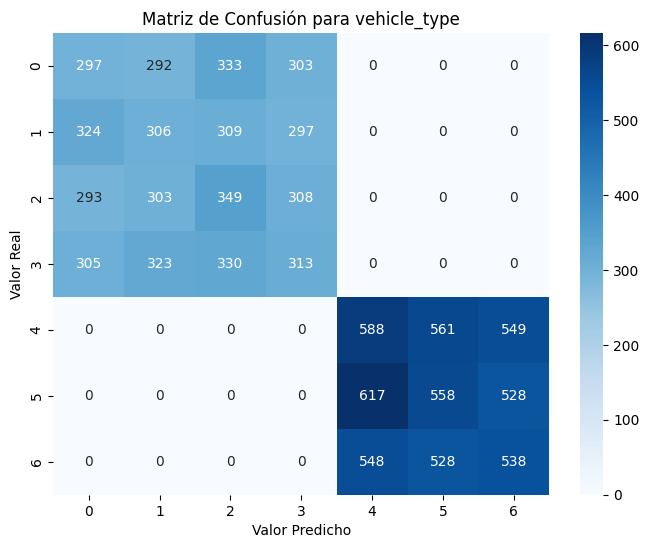


Entrenando modelo para: alternate_route_available
Reporte de clasificación para alternate_route_available:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4985
           1       1.00      1.00      1.00      2500
           2       1.00      1.00      1.00      2515

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



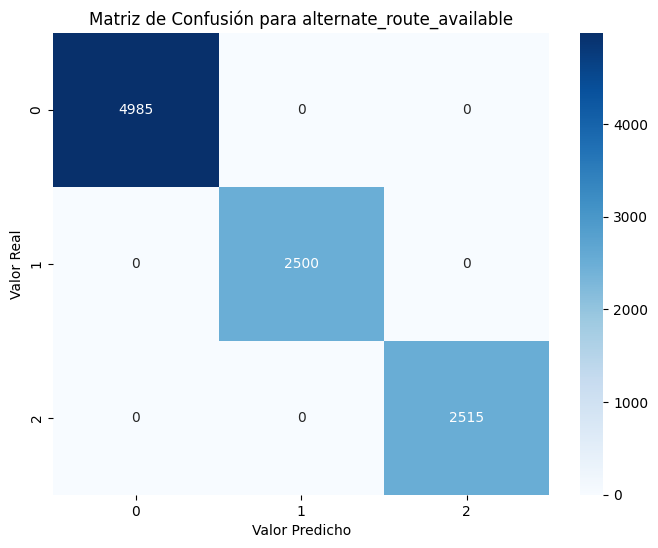

In [138]:
# Crear y entrenar el modelo Random Forest para cada variable objetivo
models = {}
for column in y.columns:
    print(f"\nEntrenando modelo para: {column}")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train[column])
    models[column] = rf_model
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = rf_model.predict(X_test)
    
    # Evaluar el rendimiento del modelo
    print(f"Reporte de clasificación para {column}:")
    print(classification_report(y_test[column], y_pred))
    
    # Matriz de confusión
    cm = confusion_matrix(y_test[column], y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión para {column}')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.show()

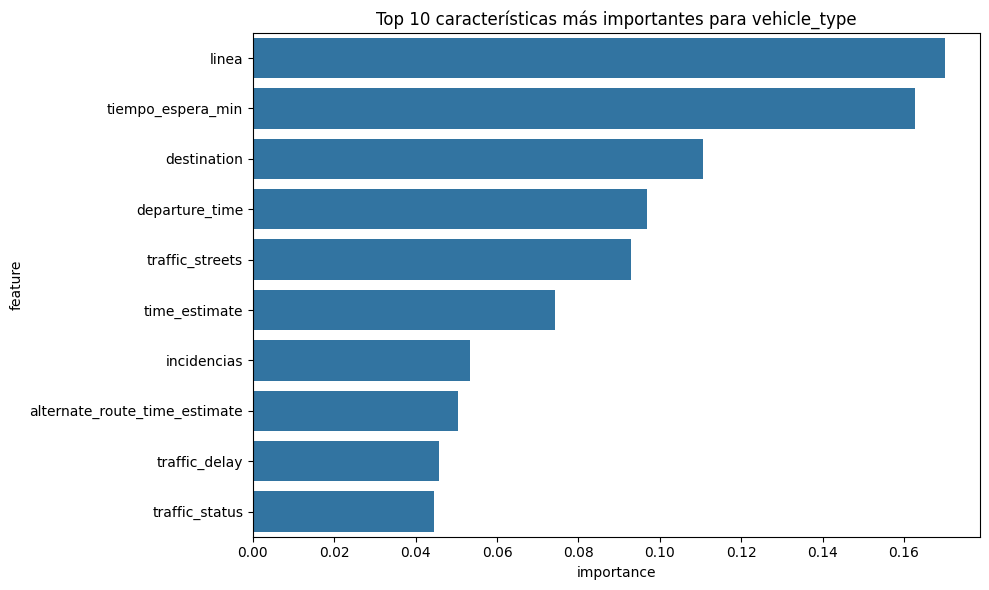

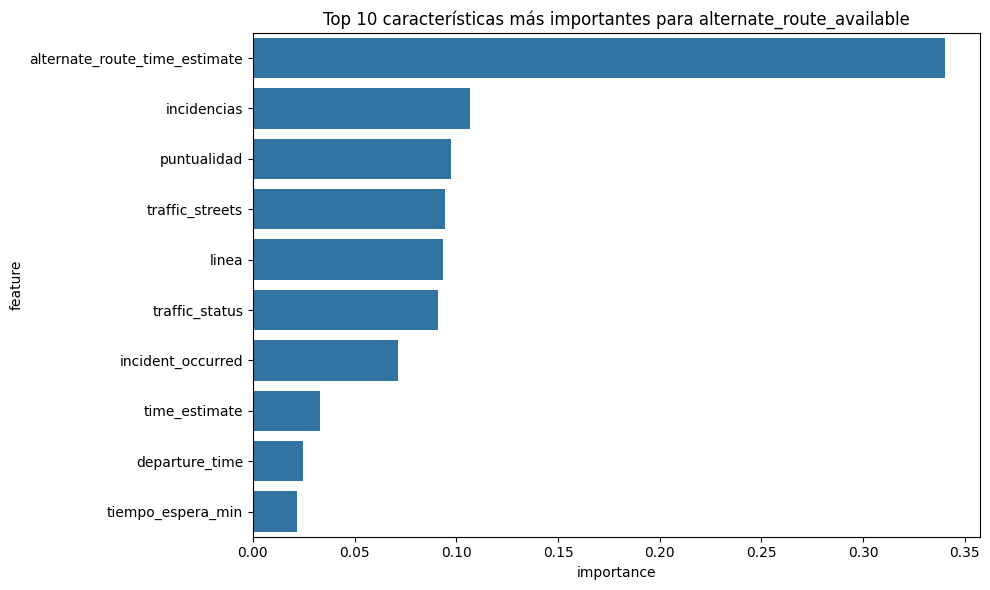

In [139]:
for column in y.columns:
    # Visualizar la importancia de las características
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': models[column].feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title(f'Top 10 características más importantes para {column}')
    plt.tight_layout()
    plt.show()

In [141]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un diccionario para almacenar los modelos
models = {column: RandomForestClassifier(random_state=42) for column in y.columns}

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(column):
    print(f"\nOptimizando modelo para: {column}")
    
    try:
        rf_random = RandomizedSearchCV(
            estimator=models[column],
            param_distributions=param_grid,
            n_iter=50,
            cv=3,
            verbose=2,
            random_state=42,
            n_jobs=1  # Usar un solo proceso
        )
        
        rf_random.fit(X_train, y_train[column])
        
        print("Mejores parámetros encontrados:")
        print(rf_random.best_params_)
        
        # Evaluar el modelo optimizado
        best_model = rf_random.best_estimator_
        y_pred_best = best_model.predict(X_test)
        
        print(f"Reporte de clasificación para el modelo optimizado de {column}:")
        print(classification_report(y_test[column], y_pred_best))
        
        # Guardar el modelo optimizado
        joblib.dump(best_model, f'random_forest_model_{column}.joblib')
        print(f"Modelo para {column} guardado como 'random_forest_model_{column}.joblib'")
        
    except Exception as e:
        print(f"Error al optimizar el modelo para {column}: {str(e)}")

# Entrenar y evaluar modelos para cada columna objetivo
for column in y.columns:
    train_and_evaluate_model(column)

print("\nEntrenamiento y optimización completados para todas las variables objetivo.")


Optimizando modelo para: vehicle_type
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total tim